In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np

In [ ]:
#from tf.keras.datasets.mnist import load_data

In [ ]:
#Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Scale the images to a range of [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

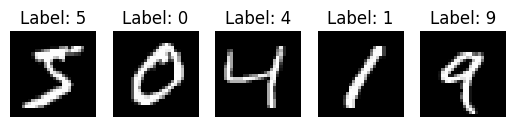

In [ ]:
#Display some MNIST images with their corresponding labels
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [ ]:
#Convert the labels to one-hot encoding
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Create a one-layer neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images to 784 values
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])

In [ ]:
#Display the model's architecture
model.summary()

#Calculate the total number of trainable parameters in the model
total_parameters = model.count_params()
print(f"Total trainable parameters: {total_parameters}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Total trainable parameters: 7850


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Load the MNIST dataset and preprocess it as shown in the previous response
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Split the training data into training and validation sets
split_ratio = 0.25
split_index = int(len(train_images) * (1 - split_ratio))
x_train, x_val = train_images[:split_index], train_images[split_index:]
y_train, y_val = train_labels[:split_index], train_labels[split_index:]

# Define the model with the specified architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer and the specified learning rate
learning_rate = 0.01
optimizer = SGD(learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the specified batch size and number of epochs
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8654 - accuracy: 0.7956 - val_loss: 0.5288 - val_accuracy: 0.8703
Epoch 2/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4941 - accuracy: 0.8739 - val_loss: 0.4353 - val_accuracy: 0.8863
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4312 - accuracy: 0.8854 - val_loss: 0.3978 - val_accuracy: 0.8948
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8919 - val_loss: 0.3765 - val_accuracy: 0.8977
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8954 - val_loss: 0.3622 - val_accuracy: 0.9017
Epoch 6/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8995 - val_loss: 0.3515 - val_accuracy: 0.9029
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3560 - accuracy: 0.9013 - val_loss: 0.3439 - val_accuracy:

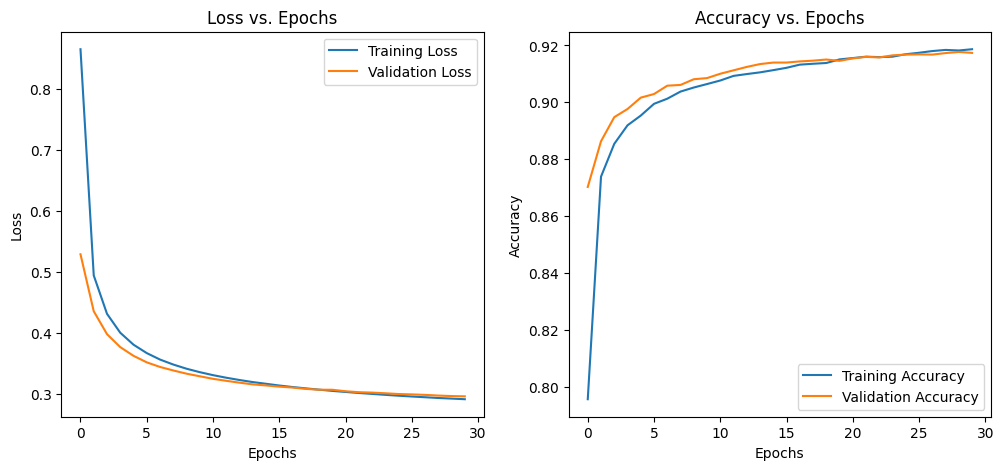

In [ ]:
#Plot the evolution of the loss and accuracy during training
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()

In [ ]:
#Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2867 - accuracy: 0.9206
Test Loss: 0.2867
Test Accuracy: 92.06%
